# Chapter10 无监督学习

无监督学习是从**无标注**的数据中学习数据的统计规律或者说内在结构的机器学习。在无监督学习中，我们不再关注预测结果，因为没有相应的响应变量Y（即标签）。我们的目标是可视化输入实例$X_1, X_2, . . . , X_p$或者是发现输入实例的子集间的内在规律。
在本章中，我们主要介绍**主成分分析（principal components analysis）**，一种在应用监督技术之前用于数据可视化或数据预处理的方法；**聚类（clustering）**，对原始数据进行分组的方法。

## 10.1 PCA

### 为什么需要降维？
* 许多机器学习问题涉及的每个训练实例有成千上万甚至数百万个特征，所有这些特征不仅使训练变得极其缓慢，而且还会使得找到好的解决方案变得更加困难。这个问题通常称为**维度灾难**。
* **数据维度越高，过拟合的风险就越大。**
如果在单位平面中随机挑两个点，这两个点之间的平均距离大约为0.52。如果在三维的单位立方体中随机挑两个点，两点之间的平均距离大约为0.66。但是如果在一个100万维的超立方体中随机挑两个点，平均距离高达408.25。这个事实说明高维数据集有很大可能是非常稀疏的：大多数训练实例可能彼此之间相距很远。所以这也意味着新的实例很可能远离任何一个训练实例，导致跟低维度相比，预测更加不可靠。简而言之，训练集的维度越高，过拟合的风险就越大。
* 理论上来说，通过增大训练集，使训练实例达到足够的密度是可以解决维度灾难的。然而在实践中，要达到给定密度，所需要的训练实例数量随着维度的增加呈指数式上升。仅仅100个特征下，要让所有训练实例（假设在所有维度上平均分布）之间的平均距离小于0.1，需要的训练实例数量就比可观察宇宙中的原子数量还要多。


### 数据降维的优点
* 数据降维能够加速训练，但也会轻微降低系统性能。
* 除了加快训练，降维对于数据可视化也非常有用。

### 10.1.1 保留差异性

主成分分析（PCA）是迄今为止最流行的降维算法，它通过识别最靠近数据的超平面，并将数据投影到超平面上实现降维，如下图所示。

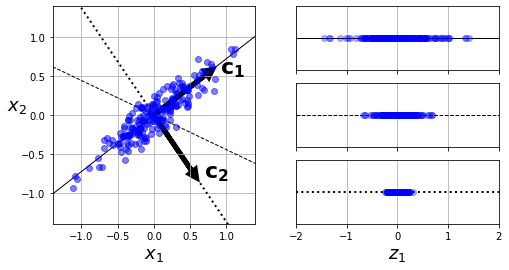

In [4]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec

angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # 拉伸
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # 旋转

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

#在3条轴的投影
X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)
plt.show()

将训练集投影到低维超平面之前需要选择正确的超平面。上图中的左图代表一个简单的2D数据集，沿三条不同的轴（即一维超平面）投影。右图是将数据集映射到每条轴上的结果。在实线上的投影保留了最大的差异性，在点线上的投影只保留了非常小的差异性，虚线上的投影的差异性居中。

### 10.1.2 主成分

主成分分析可以在训练集中识别出哪条轴对差异性的贡献率最高（在上图是由实线表示的轴）。同时它也找出了第二条轴，与第一条轴垂直，并且它对剩余差异性的贡献度最高。如果是在更高维数据集中，PCA还会找到与前两条都正交的第三条、第四条、第五条轴等等——轴的数量与数据集维度数量相同。

第i条轴称为数据的第i个主成分（PC）。在上图中，第一个主成分是向量c1所在的轴，第二个主成分是向量c2所在的轴。那么如何找到训练集的主成分呢？以下是主成分分析的详细数学推导过程：

1.假设$x$为$m$ 维随机变量，其均值为$\mu$，协方差矩阵为$\Sigma$。

考虑由$m$维随机变量$x$到$m$维随机变量$y$的线性变换
$$y _ { i } = \alpha _ { i } ^ { T } x = \sum _ { k = 1 } ^ { m } \alpha _ { k i } x _ { k } , \quad i = 1,2 , \cdots , m$$

其中$\alpha _ { i } ^ { T } = ( \alpha _ { 1 i } , \alpha _ { 2 i } , \cdots , \alpha _ { m i } )$。

如果该线性变换满足以下条件，则称之为总体主成分：

（1）$\alpha _ { i } ^ { T } \alpha _ { i } = 1 , i = 1,2 , \cdots , m$；

（2）$\operatorname { cov } ( y _ { i } , y _ { j } ) = 0 ( i \neq j )$;

（3）变量$y_1$是$x$的所有线性变换中方差最大的；$y_2$是与$y_1$不相关的$x$的所有线性变换中方差最大的；一般地，$y_i$是与$y _ { 1 } , y _ { 2 } , \cdots , y _ { i - 1 } , ( i = 1,2 , \cdots , m )$都不相关的$x$的所有线性变换中方差最大的；这时分别称$y _ { 1 } , y _ { 2 } , \cdots , y _ { m }$为$x$的第一主成分、第二主成分、…、第$m$主成分。

2.假设$x$是$m$维随机变量，其协方差矩阵是$\Sigma$，$\Sigma$的特征值分别是$\lambda _ { 1 } \geq\lambda _ { 2 } \geq \cdots \geq \lambda _ { m } \geq 0$，特征值对应的单位特征向量分别是$\alpha _ { 1 } , \alpha _ { 2 } , \cdots , \alpha _ { m }$，则$x$的第$i$主成分的方差是协方差矩阵$\Sigma$的第$i$个特征值，即$$\operatorname { var } ( y _ { i } ) = \alpha _ { i } ^ { T } \Sigma \alpha _ { i } = \lambda _ { i }$$


3.样本主成分分析就是基于样本协方差矩阵的主成分分析。

给定样本矩阵
$$X = \left[ \begin{array} { l l l l } { x _ { 1 } } & { x _ { 2 } } & { \cdots } & { x _ { n } } \end{array} \right] = \left[ \begin{array} { c c c c } { x _ { 11 } } & { x _ { 12 } } & { \cdots } & { x _ { 1 n } } \\ { x _ { 21 } } & { x _ { 22 } } & { \cdots } & { x _ { 2 n } } \\ { \vdots } & { \vdots } & { } & { \vdots } \\ { x _ { m 1 } } & { x _ { m 2 } } & { \cdots } & { x _ { m n } } \end{array} \right]$$

其中$x _ { j } = ( x _ { 1 j } , x _ { 2 j } , \cdots , x _ { m j } ) ^ { T }$是$x$的第$j$个独立观测样本，$j=1,2，…,n$。 

$X$的样本协方差矩阵
$$\left. \begin{array} { c } { S = [ s _ { i j } ] _ { m \times m } , \quad s _ { i j } = \frac { 1 } { n - 1 } \sum _ { k = 1 } ^ { n } ( x _ { i k } - \overline { x } _ { i } ) ( x _ { j k } - \overline { x } _ { j } ) } \\ { i = 1,2 , \cdots , m , \quad j = 1,2 , \cdots , m } \end{array} \right.$$

给定样本数据矩阵$X$，考虑向量$x$到$y$的线性变换$$y = A ^ { T } x$$
这里
$$A = \left[ \begin{array} { l l l l } { a _ { 1 } } & { a _ { 2 } } & { \cdots } & { a _ { m } } \end{array} \right] = \left[ \begin{array} { c c c c } { a _ { 11 } } & { a _ { 12 } } & { \cdots } & { a _ { 1 m } } \\ { a _ { 21 } } & { a _ { 22 } } & { \cdots } & { a _ { 2 m } } \\ { \vdots } & { \vdots } & { } & { \vdots } \\ { a _ { m 1 } } & { a _ { m 2 } } & { \cdots } & { a _ { m m } } \end{array} \right]$$

如果该线性变换满足以下条件，则称之为样本主成分。样本第一主成分$y _ { 1 } = a _ { 1 } ^ { T } x$是在$a _ { 1 } ^ { T } a _ { 1 } = 1$条件下，使得$a _ { 1 } ^ { T } x _ { j } ( j = 1,2 , \cdots , n )$的样本方差$a _ { 1 } ^ { T } S a _ { 1 }$最大的$x$的线性变换；

样本第二主成分$y _ { 2 } = a _ { 2 } ^ { T } x$是在$a _ { 2 } ^ { T } a _ { 2 } = 1$和$a _ { 2 } ^ { T } x _ { j }$与$a _ { 1 } ^ { T } x _ { j } ( j = 1,2 , \cdots , n )$的样本协方差$a _ { 1 } ^ { T } S a _ { 2 } = 0$条件下，使得$a _ { 2 } ^ { T } x _ { j } ( j = 1,2 , \cdots , n )$的样本方差$a _ { 2 } ^ { T } S a _ { 2 }$最大的$x$的线性变换；

一般地，样本第$i$主成分$y _ { i } = a _ { i } ^ { T } x$是在$a _ { i } ^ { T } a _ { i } = 1$和$a _ { i } ^ { T } x _ { j }$与$a _ { k } ^ { T } x _ { j } ( k < i , j = 1,2 , \cdots , n )$的样本协方差$a _ { k } ^ { T } S a _ { i } = 0$条件下，使得$a _ { i } ^ { T } x _ { j } ( j = 4,2 , \cdots , n )$的样本方差$a _ { i } ^ { T } S a _ { i }$最大的$x$的线性变换。

4.主成分分析方法主要有两种，可以通过相关矩阵的特征值分解或样本矩阵的奇异值分解进行。

（1）相关矩阵的特征值分解算法。针对$m \times n$样本矩阵$X$，求样本相关矩阵
$$R = \frac { 1 } { n - 1 } X X ^ { T }$$
再求样本相关矩阵的$k$个特征值和对应的单位特征向量，构造正交矩阵
$$V = ( v _ { 1 } , v _ { 2 } , \cdots , v _ { k } )$$

$V$的每一列对应一个主成分，得到$k \times n$样本主成分矩阵
$$Y = V ^ { T } X$$

（2）矩阵$X$的奇异值分解算法。针对$m \times n$样本矩阵$X$ 
$$X ^ { \prime } = \frac { 1 } { \sqrt { n - 1 } } X ^ { T }$$
对矩阵$X ^ { \prime }$进行截断奇异值分解，保留$k$个奇异值、奇异向量，得到
$$X ^ { \prime } = U S V ^ { T }$$
$V$的每一列对应一个主成分，得到$k \times n$样本主成分矩阵$Y$
$$Y = V ^ { T } X$$

### 10.1.3 奇异值分解（SVD）提取主成分

In [51]:
# 构建三维数据集
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)


# 使用svd函数获取全部主成分
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [52]:
c1 #第一主成分

array([0.93636116, 0.29854881, 0.18465208])

In [53]:
c2 #第二主成分

array([-0.34027485,  0.90119108,  0.2684542 ])

### 10.1.4 向下投影到低维度

In [54]:
W2 = Vt.T[:, :2] #构造转换矩阵W2
X2D = X_centered.dot(W2) #投影到二维平面

In [55]:
W2

array([[ 0.93636116, -0.34027485],
       [ 0.29854881,  0.90119108],
       [ 0.18465208,  0.2684542 ]])

In [56]:
X2D

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264],
       [-1.04466138,  0.11244353],
       [ 1.05932502, -0.31189109],
       [-1.13761426, -0.14576655],
       [-1.16044117, -0.36481599],
       [ 1.00167625, -0.39422008],
       [-0.2750406 ,  0.34391089],
       [ 0.45624787, -0.69707573],
       [ 0.79706574,  0.26870969],
       [ 0.66924929, -0.65520024],
       [-1.30679728, -0.37671343],
       [ 0.6626586 ,  0.32706423],
       [-1.25387588, -0.56043928],
       [-1.04046987,  0.08727672],
       [-1.26047729, -0.1571074 ],
       [ 1.09786649, -0.38643428],
       [ 0.7130973 , -0.64941523],
       [-0.17786909,  0.43609071],
       [ 1.02975735, -0.33747452],
       [-0.94552283,

In [57]:
X2D.shape

(60, 2)

In [58]:
X_centered.shape

(60, 3)

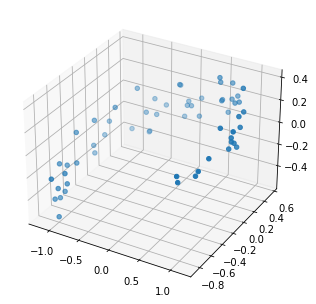

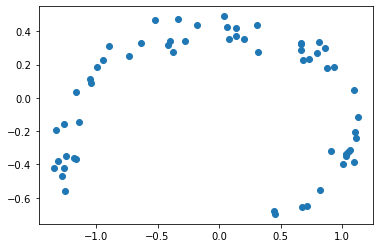

In [59]:
from mpl_toolkits.mplot3d import Axes3D
#原始数据
fig=plt.figure()
ax = Axes3D(fig)
ax.scatter(X_centered[:,0],X_centered[:,1],X_centered[:,2])
plt.show()
#PCA平面
fig,ax= plt.subplots(1,1,)
ax.scatter(X2D[:,0],X2D[:,1])
plt.show()

### 10.1.5 使用Scikit-Learn实现PCA

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D_ = pca.fit_transform(X) #sklearn会自动处理数据标准化问题

In [61]:
X2D_.shape

(60, 2)

### 10.1.6 方差解释比率

**在一个给定的数据集中，将观测投影到前几个少数的主成分上损失了多少信息？即数据的方差中有多少是不在前两个主成分的解释范围内的？** 更通俗地说，我们感兴趣的是每个主成分的方差解释比率（proportion of variance explained，PVE）。数据集（假设变量已中心化，其均值为0）中总方差的定义如下：
$$
\sum_{j=1}^{p}Var(X_j)= \sum_{j=1}^{p}\frac{1}{n} \sum_{i=1}^{n}x_{ij}^2\
$$
第$m^{th}$个主成分的方差是:
$$
\frac{1}{n}\sum_{i=1}^{n} z_{im}^2=\frac{1}{n}  \sum_{i=1}^{n}(\sum_{j=1}^{p}\phi_{jm}x_{ij})^2\
$$
因此，第$m^{th}$个主成分的PVE可以由以下公式得到:
$$
\frac{\sum_{i=1}^{n}(\sum_{j=1}^{p}\phi_{jm}x_{ij})^2}{\sum_{j=1}^{p} \sum_{i=1}^{n}x_{ij}^2} \
$$
每个主成分的PVE都是正值。为了计算前$M$个主成分的累计PVE，可以简单地对前$M$个PVE进行求和。

In [71]:
pca.explained_variance_ratio_


array([0.84248607, 0.14631839])

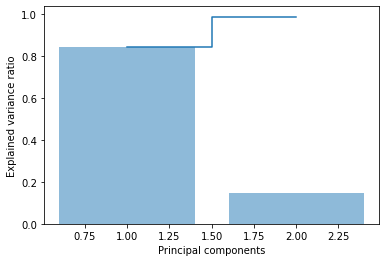

In [76]:
plt.bar(range(1,3),pca.explained_variance_ratio_,alpha=0.5,align='center')
plt.step(range(1,3),np.cumsum(pca.explained_variance_ratio_),where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

### 10.1.7 选择正确的维度

In [20]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

from sklearn.model_selection import train_test_split
X = mnist["data"]
y = mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
# 不降低维度的情况下执行PCA，然后计算保留95%训练集方差所需的最小维度

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [24]:
d

153

In [26]:
X.shape[1]

784

In [29]:
# 也可以将n_components设置为0.0-1.0之间的浮点数来表示要保留的反差率，而不是指定要保留的主成分数

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [30]:
pca.n_components_

153

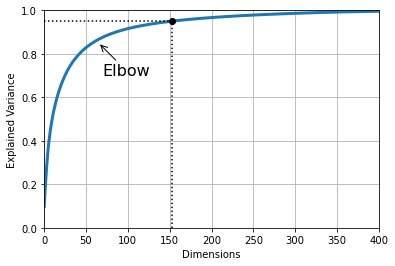

In [31]:
# 另一种选择是将可解释方差绘制成维度的函数（即累计方差解释比率图）
# 曲线上通常会出现一个拐点，其中可解释方差会停止快速增大

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
# 使用inverse_transform()方法将其解压缩回784个维度
pca = PCA(n_components = 153)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

## 10.2 KPCA(内核主成分分析）

一般来说，主成分分析(Principal Components Analysis, PCA)适用于数据的线性降维。而核主成分分析(Kernel PCA, KPCA)可实现数据的非线性降维，用于处理线性不可分的数据集。

KPCA的大致思路是：对于输入空间(Input space)中的矩阵$X$，我们先用一个非线性映射把$X$中的所有样本映射到一个高维甚至是无穷维的空间(称为特征空间，Feature space)，(使其线性可分)，然后在这个高维空间进行PCA降维。

### 10.2.1 在二维数据集中的应用

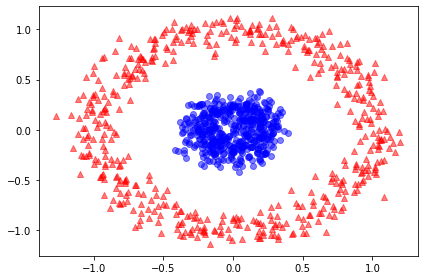

In [77]:
# 创建二维数据
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=1000,random_state=123,noise=0.1,factor=0.2)

plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)
plt.tight_layout()
plt.show()

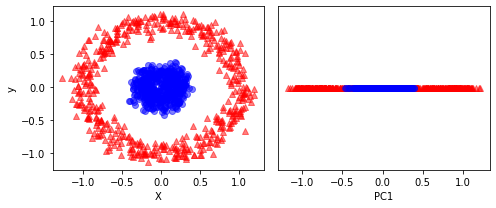

In [79]:
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))

ax[0].scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_spca[y==0,0],np.zeros((500,1)),
              color='red',marker='^',alpha=0.5)
ax[1].scatter(X_spca[y==1,0],np.zeros((500,1)),
              color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

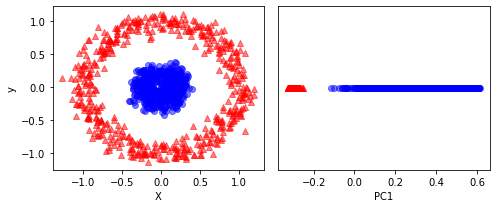

In [80]:
from sklearn.decomposition import KernelPCA

scikit_kpca = KernelPCA(n_components=1,kernel='rbf',gamma=15)
X_kpca = scikit_kpca.fit_transform(X)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(7,3))

ax[0].scatter(X[y==0,0],X[y==0,1],
              color='red',marker='^',alpha=0.5)
ax[0].scatter(X[y==1,0],X[y==1,1],
              color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((500,1)),
              color='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((500,1)),
              color='blue',marker='o',alpha=0.5)

ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

### 10.2.2 在三维数据集中应用

In [82]:
#创建数据集
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

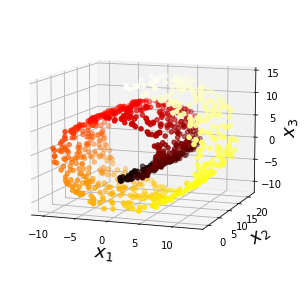

In [83]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

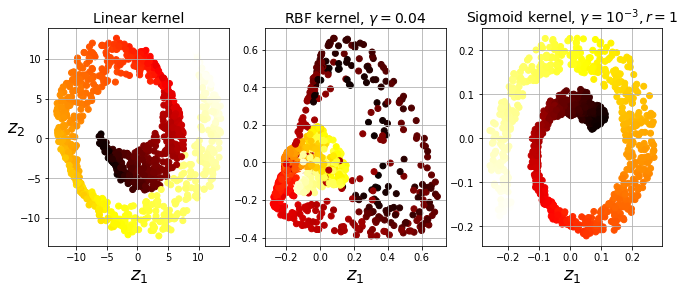

In [38]:
#将数据投影到二维平面
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)                       #线性PCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04, fit_inverse_transform=True)              #KPCA（RBF核函数）
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)#KPCA（sigmoid核函数）

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

由于KPCA是一种无监督学习算法，因此没有明显的性能指标来帮助我们选择最好的内核和超参数值。因此我们可以使用网格搜索来选择在该任务上能获得最佳性能的内核和超参数。

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Pipeline类可以将多个处理步骤合并为单个scikit-learn估计器
# Pipeline类最常见的用例是将预处理步骤（比如数据缩放）与一个监督模型（比如分类器）链接在一起
# 构建管道
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

#参数网格
param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),#np.linspace主要用来创建等差数列
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

#网格搜索
#GridSearchCV：在指定的参数范围内，利用调整的参数训练学习器，从所有的参数中找到在验证集上精度最高的参数，这其实是一个训练和比较的过程
#GridSearchCV实现自动调参，得到最优化的结果和参数
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [46]:
# 通过best_params_变量来得到最佳内核和超参数
print(grid_search.best_params_)

{'kpca__gamma': 0.03888888888888889, 'kpca__kernel': 'rbf'}
